# Entropy, Gibbs Function, and Equilibrium Constants
This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 7 February 2020.

The objectives of this tutorial Notebook are to show how to access and manipulate two additional thermodynamic properties (entropy and Gibbs function) using Cantera's `Solution()` object, and to introduce the concepts of chemical equilibrium and equilibrium constants. We also take a first look at chemical reactions. We will define the gas mixture using gri30.cti.

The reader should be familiar with the material in the previous Notebook (2_6_Adiabatic_flame_temperature) before working through this Notebook.

## 1.Entropy

Several attributes of Cantera's `Solution()` object pertain to entropy: [`s`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.s), [`entropy_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.entropy_mass), [`entropy_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.entropy_mole), [`partial_molar_entropies`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.partial_molar_entropies), and [`standard_entropies_R`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.standard_entropies_R).

To see what each of these does, you can click on the links provided in the previous paragraph. We start (as usual) by defining an ideal-gas mixture using Cantera's `Solution()` object and GRI-Mech 3.0:

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution()" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

# list all available attributes of "gas1"
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

In [3]:
help(gas1.__class__.s)

Help on getset descriptor cantera._cantera.ThermoPhase.s:

s
    Entropy [J/kg/K or J/kmol/K] depending on `basis`.



In [4]:
help(gas1.__class__.entropy_mass)

Help on getset descriptor cantera._cantera.ThermoPhase.entropy_mass:

entropy_mass
    Specific entropy [J/kg].



In [5]:
help(gas1.__class__.entropy_mole)

Help on getset descriptor cantera._cantera.ThermoPhase.entropy_mole:

entropy_mole
    Molar entropy [J/kmol/K].



In [6]:
help(gas1.__class__.partial_molar_entropies)

Help on getset descriptor cantera._cantera.ThermoPhase.partial_molar_entropies:

partial_molar_entropies
    Array of species partial molar entropies [J/kmol/K].



These entropy attributes are analogous to the specific heat and enthalpy attributes that we saw earlier. 

It is important to bear in mind that the entropy of an individual ideal-gas species, or of an ideal-gas mixture, depends on pressure as well as on temperature. This is in contrast to specific heats, internal energy, and enthalpy, which depend only on temperature. 

The entropy values used in Cantera are consistent with those used in Turns 4th ed. To see that, we compute and plot the entropies (on a molar basis) for several species as functions of temperature, at a pressure of 1 atm (the reference pressure). Note that to do this, we set the mixture composition to correspond to 100% of each species of interest. That is because the individual species entropies depend on the mole fraction of the species in the mixture (i.e., on the species partial pressure, which is equal to the mixture pressure times the mole fraction of the species of interest).

In [7]:
# list the species of interest
species = ['CO', 'CO2', 'H2', 'H', 'OH']

# nspec is the number of species of interest
nspec   = len(species)

nspec

5

In [8]:
# define temperatures at which species entropies are to be computed
tmin = gas1.min_temp
tmax = gas1.max_temp + 1.
tinc = 100.
tarr = np.arange(tmin,tmax,tinc)
nt   = len(tarr)

# define and initialize a 2D array to hold the temperature-dependent entropy for each species
sarr = np.zeros(shape=(nspec,nt))

for j , T in enumerate(tarr):            # loop over temperatures
    gas1.TP = T,ct.one_atm
    for i , speci in enumerate(species): # loop over species for each temperature
        speci1    = speci + ':1.0'       # this character string is defined for use in the following line
        gas1.TPX  = T,ct.one_atm,speci1  # set the mixture composition to be 100% of the current species of interest
        sarr[i,j] = gas1.entropy_mole
#        sarr[i,j] = gas1.partial_molar_entropies[gas1.species_index(species[i])]  # this gives the same result

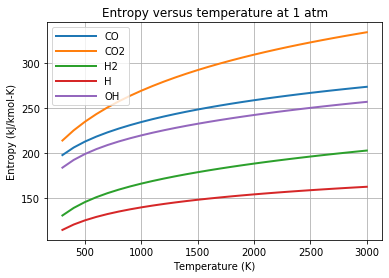

In [9]:
# plot the results
fig, ax = plt.subplots()
for i , speci in enumerate(species):
    ax.plot(tarr, sarr[i,:]/1000., label=speci, lw=2) # divide by 1000. to give units of kJ/kmol-K
    
ax.set(xlabel='Temperature (K)',
       ylabel='Entropy (kJ/kmol-K)',
       title ='Entropy versus temperature at 1 atm')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("s_vs_T_1atm.pdf")

These results are consistent with the values in the column headed $\overline s ^ 0 (T)$ in Tables A.1-A.5 of Turns 4th ed. Results for other species can be obtained similarly. Recall that there are 53 species in "gas1".

## 2. Gibbs function

Several attributes of Cantera's `Solution()` object pertain to Gibbs function, or Gibbs free energy. In particular, the attributes [`g`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.g), [`gibbs_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.gibbs_mass), and [`gibbs_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.gibbs_mole) are analogous to `s`, `entropy_mass`, and `entropy_mole` above for entropy. Note, however, that there is no "partial_molar_gibbs" attribute for individual species Gibbs function values.

Species Gibbs functions (on a molar basis) can be plotted as functions of temperature (for a fixed pressure) as was done above for species entropies:

In [10]:
# list the species of interest
species = ['CO', 'CO2', 'H2', 'H', 'OH']

# nspec is the number of species of interest
nspec   = len(species)

In [11]:
# define temperatures at which species Gibbs free energies are to be computed
tmin = gas1.min_temp
tmax = gas1.max_temp + 1.
tinc = 100.
tarr = np.arange(tmin,tmax,tinc)
nt   = len(tarr)

# define and initialize a 2D array to hold the temperature-dependent Gibbs function for each species
garr = np.zeros(shape=(nspec,nt))

for j , T in enumerate(tarr):            # loop over temperatures
    gas1.TP = T,ct.one_atm
    for i , speci in enumerate(species): # loop over species for each temperature
        speci1    = speci + ':1.0'       # this character string is defined for use in the following line
        gas1.TPX  = T,ct.one_atm,speci1  # set the mixture composition to be 100% of the current species of interest
        garr[i,j] = gas1.gibbs_mole

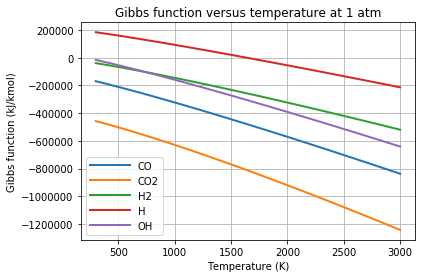

In [12]:
# plot species Gibbs functions as functions of temperature
fig, ax = plt.subplots()
for i , speci in enumerate(species):
    ax.plot(tarr, garr[i,:]/1000., label=speci, lw=2) # divide by 1000. to give units of kJ/kmol-K
ax.set(xlabel='Temperature (K)',
       ylabel='Gibbs function (kJ/kmol)',
       title ='Gibbs function versus temperature at 1 atm')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("g_vs_T_1atm.pdf")

These values cannot be compared directly with those given in Appendix A of Turns 4th ed. There a different Gibbs function quantity is tabulated: the Gibbs function of formation, denoted as $\overline g ^ 0 _ f (T)$, which is defined in Chapter 2.

It is readily confirmed that $ \overline g = \overline h - T \overline s $ for each species:

In [13]:
hmTsarr = np.zeros(shape=(nspec,nt))

for j , T in enumerate(tarr):
    gas1.TP = T,ct.one_atm
    for i , speci in enumerate(species):
        speci1       = speci + ':1.0'
        gas1.TPX     = T,ct.one_atm,speci1
        hmTsarr[i,j] = gas1.enthalpy_mole - T*gas1.entropy_mole # compute h-Ts (in molar units)

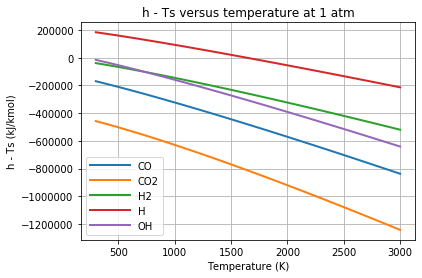

In [14]:
fig, ax = plt.subplots()
for i , speci in enumerate(species):
    ax.plot(tarr, hmTsarr[i,:]/1000., label=speci, lw=2) # divide by 1000. to give units of kJ/kmol-K
    
ax.set(xlabel='Temperature (K)',
       ylabel='h - Ts (kJ/kmol)',
       title ='h - Ts versus temperature at 1 atm')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("hmTs_vs_T_1atm.pdf")

The figure is identical to the previous figure.

## 3. Equilibrium constants

In combustion, entropy and Gibbs function are used most often in the context of discussions of chemical equilibrium. The underlying physical concept is that, given sufficient time, a system (here, an ideal-gas mixture) will eventually reach a thermochemical state (e.g., mixture pressure and temperature, and species composition expressed in terms of partial pressures, mole fractions, mass fractions, or molar concentrations) that maximizes the entropy of the system, subject to the constraints. This final state is the equilibrium state of the mixture. The constraints are that the relative numbers of different elements in the system (e.g., the numbers of C, H, O, and N atoms) cannot change, plus some information on the thermodynamic process under which the system reaches equilibrium (e.g., equilibrium at a specified mixture pressure and temperature).

In the particular case of a system that is brought to equilibrium at a specified mixture pressure and temperature, the equilibrium composition is the composition that minimizes the Gibbs free energy of the system, subject to the constraints on the relative proportions of the numbers of atoms each element in the system. The result can be expressed in terms of an equilibrium constant, as discussed in Chapter 2 of Turns 4th ed.

The attribute [`equilibrium_constants`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/kinetics.html#cantera.Kinetics.equilibrium_constants) is relevant here:

In [15]:
help(gas1.__class__.equilibrium_constants)

Help on getset descriptor cantera._cantera.Kinetics.equilibrium_constants:

equilibrium_constants
    Equilibrium constants in concentration units for all reactions.



Note that `equilibrium_constants` reports a molar-concentration equilibrium constant. The relationship between the molar-concentration equilibrium constant and the partial-pressure equilibrium constant introduced in Chapter 2 of Turns 4th ed. is discussed below. Also note that equilibrium constants are associated with chemical reactions, not with elements or species. In fact, the value of the equilibrium constant for a reaction is not really a constant at all; rather, it is a function of the mixture temperature, as discussed below.

So at this point, we need to introduce some basic `Solution()` attributes that are related to chemical reactions. We will talk more about chemical reactions when we get to Chapters 4 and 5.

Attribute [`n_reactions`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/kinetics.html#cantera.Kinetics.n_reactions) gives the number of chemical reactions in the reaction mechanism under consideration (here, GRI-Mech 3.0):

In [16]:
# print the number of species and the number of reactions considered in GRI-Mech 3.0
gas1.n_species, gas1.n_reactions

(53, 325)

As we have seen earlier, 53 species are considered in GRI-Mech 3.0. We now see that these 53 species are involved in 325 individual chemical reactions. Attributes [`reaction_equation()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/kinetics.html#cantera.Kinetics.reaction_equation) and [`reaction_equations`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/kinetics.html#cantera.Kinetics.reaction_equations) provide information about chemical reactions:

In [17]:
help(gas1.__class__.reaction_equation)

Help on method_descriptor:

reaction_equation(...)
    Kinetics.reaction_equation(self, int i_reaction)
    The equation for the specified reaction. See also `reaction_equations`.



In [18]:
help(gas1.__class__.reaction_equations)

Help on method_descriptor:

reaction_equations(...)
    Kinetics.reaction_equations(self, indices=None)
    
    Returns a list containing the reaction equation for all reactions in the
    mechanism (if *indices* is unspecified) or the equations for each
    reaction in the sequence *indices*. For example::
    
        >>> gas.reaction_equations()
        ['2 O + M <=> O2 + M', 'O + H + M <=> OH + M', 'O + H2 <=> H + OH', ...]
        >>> gas.reaction_equations([2,3])
        ['O + H + M <=> OH + M', 'O + H2 <=> H + OH']
    
    See also `reaction_equation`.



So, `reaction_equations` is a list of the individual reactions, and `reaction_equation()` is a function that returns the reaction equation corresponding to a given reaction index.

In [19]:
# print all 325 reactions
gas1.reaction_equations()

['2 O + M <=> O2 + M',
 'H + O + M <=> OH + M',
 'H2 + O <=> H + OH',
 'HO2 + O <=> O2 + OH',
 'H2O2 + O <=> HO2 + OH',
 'CH + O <=> CO + H',
 'CH2 + O <=> H + HCO',
 'CH2(S) + O <=> CO + H2',
 'CH2(S) + O <=> H + HCO',
 'CH3 + O <=> CH2O + H',
 'CH4 + O <=> CH3 + OH',
 'CO + O (+M) <=> CO2 (+M)',
 'HCO + O <=> CO + OH',
 'HCO + O <=> CO2 + H',
 'CH2O + O <=> HCO + OH',
 'CH2OH + O <=> CH2O + OH',
 'CH3O + O <=> CH2O + OH',
 'CH3OH + O <=> CH2OH + OH',
 'CH3OH + O <=> CH3O + OH',
 'C2H + O <=> CH + CO',
 'C2H2 + O <=> H + HCCO',
 'C2H2 + O <=> C2H + OH',
 'C2H2 + O <=> CH2 + CO',
 'C2H3 + O <=> CH2CO + H',
 'C2H4 + O <=> CH3 + HCO',
 'C2H5 + O <=> CH2O + CH3',
 'C2H6 + O <=> C2H5 + OH',
 'HCCO + O <=> 2 CO + H',
 'CH2CO + O <=> HCCO + OH',
 'CH2CO + O <=> CH2 + CO2',
 'CO + O2 <=> CO2 + O',
 'CH2O + O2 <=> HCO + HO2',
 'H + O2 + M <=> HO2 + M',
 'H + 2 O2 <=> HO2 + O2',
 'H + H2O + O2 <=> H2O + HO2',
 'H + N2 + O2 <=> HO2 + N2',
 'AR + H + O2 <=> AR + HO2',
 'H + O2 <=> O + OH',
 '2 H 

Scrolling down through the list, it can be seen that most of the 325 reactions considered are reversible reactions (<=> notation), and that there are either two or three species involved on the left-hand side and on the right-hand side of each reaction. In some cases, the symbol "M" is used to denote a generic species or molecule, where "M" can refer to any of the 53 species in the gas mixture; this will be discussed further when we get to Chapter 4.

The values of the equilibrium constants for all 325 reactions at the current mixture temperature can be accessed as follows:

In [20]:
# access the values of the equilibrium constants for all reactions at the current mixture temperature
gas1.equilibrium_constants

array([1.92308444e+04, 1.61008438e+04, 1.63324159e+00, 5.05473996e+03,
       5.42986813e+01, 1.55883669e+11, 7.65914171e+05, 3.90699166e+12,
       7.55473564e+06, 7.41587127e+03, 2.57232725e+01, 6.56424247e+03,
       8.44643884e+05, 3.44357558e+05, 3.08150519e+02, 5.28202530e+04,
       2.10045765e+06, 1.04043539e+02, 2.61638507e+00, 3.01725178e+05,
       3.33099776e+01, 2.80149818e-01, 2.03680180e+04, 1.06697958e+05,
       5.12316702e+03, 3.87938592e+05, 1.41634777e+02, 2.45685507e+10,
       1.05755667e+01, 2.63641671e+03, 3.41339275e-01, 6.09626849e-02,
       3.18529617e+00, 3.18529617e+00, 3.18529617e+00, 3.18529617e+00,
       3.18529617e+00, 8.37240608e-01, 9.85821322e+03, 9.85821322e+03,
       9.85821322e+03, 9.85821322e+03, 2.97346541e+04, 7.81561857e+03,
       3.09491259e+03, 4.23203356e+03, 3.32459580e+01, 4.24377782e+05,
       1.40989328e+01, 5.39639406e+03, 2.50635084e+01, 6.25925174e+02,
       1.57498270e+01, 5.22499324e+01, 5.17157958e+05, 3.04823300e-01,
      

Recall that the current mixture temperature is 3000 K. It was set to that value at the end of Section 2 above.

In [21]:
# access the current mixture temperature (K)
gas1.T

3000.0

Let's focus on one specific reaction, as an example: $ H + 2 O_2 \leftrightharpoons HO_2 + O_2 $. There are ways to find particular reactions of interest in a large reaction mechanism, and we will look at those when we get to Chapters 4 and 5. For now, we simply note that this reaction corresponds to reaction index 33 in the current mechanism:

In [22]:
# access the reaction equation corresponding to reaction index 33
# note the use of parentheses here, since "reaction_equation" is a function
gas1.reaction_equation(33)

'H + 2 O2 <=> HO2 + O2'

In [23]:
# access the value of the equilbrium constant for reaction index 33 at the current mixture temperature
# note the use of square brackets here, since "equilibrium_constants" is an array, not a function
gas1.equilibrium_constants[33]

3.1852961659194317

At this point, it is appropriate to review some basic information about equilibrium constants.

The partial-pressure equilibrium constant $\kappa _p$ introduced in Chapter 2 of Turns 4th ed. is related to the change in Gibbs free energy (or Gibbs function) between the right-hand side and the left-hand side of the reaction under consideration. For the reaction of current interest, the relationship between $ \kappa _ p $ and the change in the Gibbs function for the reaction $ \Delta G ^ 0 (T) $ (as defined in Chapter 2 of Turns 4th ed.) can be written as follows:

$$ \kappa _ p = \kappa _ p (T) \equiv \exp \{ - \Delta G ^ 0 (T) / ( R_u T ) \} = \frac{(P_{HO_2}/P^0)\cdot(P_{O_2}/P^0)}{(P_{H}/P^0)\cdot(P_{O_2}/P^0)^2} = \frac{(P_{HO_2}/P^0)}{(P_{H}/P^0)\cdot(P_{O_2}/P^0)} = \frac{\chi_{HO_2}}{\chi_{H} \cdot \chi_{O_2}} (P/P^0)^{-1} $$

where $R_u$ is the molar (universal) gas constant, $P_i$ denotes the equilibrium partial pressure of species $i$ in the mixture, $P^0$ is the reference pressure (1 atm), and $ \chi _ i $ is the equilibrium mole fraction of species $i$ in the mixture. That is, for a given temperature $T$, there is a unique relationship among the partial pressures of the species that participate in the reaction, when the system is in chemical equilibrium. While the equilibrium species partial pressures depend only on temperature, the equilibrium species mole fractions also depend on mixture pressure in the case where the number of moles (or molecules) is different on the left-hand side and the right-hand side of the reaction of interest (as in the current example). The partial-pressure equilibrium constant $\kappa _p$ is dimensionless.

As noted earlier, the equilibrium constant reported by `equlibrium_constants` is a molar-concentration equilibrium constant, denoted as $ \kappa _ c $. The relationship between the partial-pressure equilibrium constant $\kappa _ p$ and the molar-concentration equilibrium constant $\kappa _ c $ follows from the ideal-gas equation of state. The result is given in Chapter 4 of Turns 4th ed. For the current reaction:

$$ \kappa _ c = \kappa _ c (T) = \kappa _ p (T) R_u T / P^0 =\frac{[ HO_2 ]}{[H] [O_2]} $$

where square brackets denote equilibrium species molar concentrations (kmol/m^3). 

So, what are the units of Cantera's equilibrium constant? Since it is a molar-concentration equilibrium constant, its units are those of molar concentration (kmol/m^3) raised to a power that is the difference between the number of moles (or molecules) on the right-hand side of the reaction minus the number of moles (or molecules) on the left-hand side. For the case where the numbers of moles or molecules are the same on both sides of a reaction, $\kappa_c (T)$ is dimensionless and $\kappa_c (T) = \kappa_p (T)$. For the present case where there are two moles (or molecules) on the right-hand side and three moles (or molecules) on the left-hand side of the reaction, the units of $\kappa_c (T)$ are (kmol/m^3)^{-1} or m^3/kmol. 

From the above equations, it can be seen that the values of $ \kappa _ p $ and $ \kappa _ c $ are inherently non-negative, and that they are functions of temperature only (independent of pressure). (The term "equilibrium constant" is somewhat contradictory, in this respect, as noted earlier.) The larger the numerical value of the equilibrium constant, the more strongly the equilibrium composition is shifted to favor the right-hand side of the reaction (here, more $HO_2$, and less $H$ and $O_2$). Conversely, the smaller the numerical value of the equilibrium constant, the more strongly the equilibrium composition is shifted toward the left-hand side of the reaction (here, more $H$ and $O_2$, and less $HO_2$).

To confirm that the value of the equilibrium constant reported by `equilibrium_constants` is consistent with the above expressions, let's set the composition of gas1 to correspond to the equilibrium composition at 2500 K and 10 atm for an system where the numbers of hydrogen and oxygen atoms are equal. Here we are getting ahead of ourselves a bit (the [`equilibrate()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.equilibrate) function will be discussed in detail in the next tutorial Notebook), but this will serve as a preview for that.

In [24]:
# set the temperature, pressure, and composition of the gas mixture
# note that the numbers of hydrogen atoms and oxygen atoms in the system are equal, and that they are (for now)
#   bound up in diatomic H2 and O2 molecules, respectively
gas1.TPX = 2500. , 10.*ct.one_atm, ('H2:1.0 O2:1.0')
gas1()


  gri30:

       temperature            2500  K
          pressure     1.01325e+06  Pa
           density        0.829046  kg/m^3
  mean mol. weight         17.0073  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.3766e+06        7.443e+07     J
   internal energy      3.1544e+06        5.365e+07     J
           entropy           13136        2.234e+05     J/K
    Gibbs function     -2.8463e+07       -4.841e+08     J
 heat capacity c_p          2197.8        3.738e+04     J/K
 heat capacity c_v          1708.9        2.906e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2            0.5         0.059265         -18.6032
                O2            0.5         0.940735         -27.9741
     [  +51 minor]              0                0



In [25]:
# now compute the equilibrium composition at a fixed temperature of 2500 K and pressure of 10 atm
# the "equilibrate" function will be discussed in detail in the following tutorial Notebook
gas1.equilibrate('TP')
gas1()


  gri30:

       temperature            2500  K
          pressure     1.01325e+06  Pa
           density         1.09613  kg/m^3
  mean mol. weight         22.4863  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.7989e+06       -6.294e+07     J
   internal energy     -3.7233e+06       -8.372e+07     J
           entropy           11705        2.632e+05     J/K
    Gibbs function     -3.2061e+07       -7.209e+08     J
 heat capacity c_p          2182.3        4.907e+04     J/K
 heat capacity c_v          1812.6        4.076e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00213617      0.000191506         -24.0588
                 H    0.000367791      1.64861e-05         -12.0294
                 O     0.00260854       0.00185602         -14.2031
                O2        

Note that several more species are present in the equilibrium mixture, compared to the original H2-O2 mixture. But the numbers of hydrogen atoms and oxygen atoms in the equilibrium mixture are the same as those in the initial mixture.

Now compare the value of the equilibrium constant reported by `equilibrium_constants` for reaction index 33 with the value implied by the equilibrium molar concentrations of the species that are involved in that reaction:

In [26]:
# use "equilibrium_constants"
K_c1 = gas1.equilibrium_constants[33]

# use the equilibrium molar concentrations of HO2, H, and O2
K_c2 = gas1.concentrations[gas1.species_index('HO2')] \
              / ( gas1.concentrations[gas1.species_index('H')]*gas1.concentrations[gas1.species_index('O2')] )

K_c1 , K_c2

(15.449778518892254, 15.449778518892144)

The two values are the same to within roundoff error, as they should be.

Now let's plot the equilibrium constant for the current reaction as a function of temperature. The numerical value of the equilibrium constant varies over several orders of magnitude over the temperature range for which the property data in gri30.cti are valid, so that a logarithmic scale is appropriate:

In [27]:
# define temperatures at which equilibrium constants are to be computed and plotted
tmin = gas1.min_temp
tmax = gas1.max_temp + 1.
tinc = 100.
tarr = np.arange(tmin,tmax,tinc)
nt   = len(tarr)

# define an array to hold the temperature-dependent equilibrium constant for one reaction
kappacarr = np.zeros(nt)

# the reaction index must be an integer, since we will use it as an array index
rindex = 33

# compute the equilibrium constant for reaction index rindex as a function of temperature
for i , T in enumerate(tarr):
    gas1.TP      = T , ct.one_atm
    kappacarr[i] = gas1.equilibrium_constants[rindex]

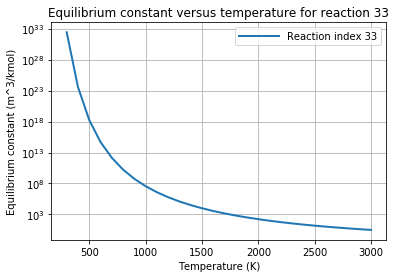

In [28]:
# plot the results
fig, ax = plt.subplots()
ax.semilogy(tarr, kappacarr, label='Reaction index 33', lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Equilibrium constant (m^3/kmol)',
       title ='Equilibrium constant versus temperature for reaction 33')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("kappac_vs_T_33.pdf")

For this reaction, the value of $ \kappa _c (T) $ is much greater than unity for all temperatures, and increasingly so at lower temperatures. Therefore, equilibrium for this reaction would correspond to a high molar concentration of $HO_2$ and to low molar concentrations of $H$ and $O_2$, especially at lower temperatures.

## 4. Chemical equilibrium

In the next tutorial Notebook, we will look more closely at the use of Cantera's `equilibrate()` function to compute the equilibrium composition and thermodynamic state of a gas mixture. As we will see, it will not be necessary to concern ourselves explicitly with changes in Gibbs function values for individual reactions, or with the values of reaction equilibrium constants. Those are needed to introduce the underlying physics, and to see how the thermodynamic bookkeeping is done internally.